In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.iloc[:,2:4]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [4]:
X = data.iloc[:,2:4].values #inputs
X.shape

(400, 2)

In [5]:
y = data.iloc[:,-1].values #output
y.shape

(400,)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape

(320, 2)

In [8]:
X_test.shape

(80, 2)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.6206959 , -1.61696642],
       [-0.23370576,  0.13861802],
       [-1.20118111,  0.28491673],
       [-0.04021069, -0.38805731],
       [-0.04021069,  2.15754013],
       [-0.3304533 , -0.79769368],
       [-0.23370576, -0.15397939],
       [-1.10443358,  0.31417647],
       [-1.10443358,  0.40195569],
       [ 0.05653684, -0.5928755 ],
       [ 1.02401219, -1.20733005],
       [ 0.05653684, -0.27101835],
       [-0.23370576, -1.26584953],
       [-0.71744344,  0.28491673],
       [-0.23370576, -0.68065472],
       [-0.13695823, -0.30027809],
       [ 1.21750726, -1.00251187],
       [ 0.92726465, -1.06103135],
       [ 0.83051712, -0.85621316],
       [-0.13695823, -0.21249887],
       [-0.91093851,  0.54825439],
       [-0.42720083, -0.56361576],
       [-0.04021069,  0.28491673],
       [-0.6206959 ,  0.54825439],
       [ 1.89474   , -0.30027809],
       [ 1.02401219,  0.57751413],
       [-1.10443358, -0.79769368],
       [-0.3304533 , -0.79769368],
       [-1.78166632,

In [11]:
X_test= scaler.transform(X_test)
X_test

array([[-0.6206959 , -0.35879757],
       [ 0.92726465,  2.15754013],
       [ 0.83051712, -1.11955083],
       [-0.23370576, -0.35879757],
       [ 0.34677945, -0.7391742 ],
       [-0.71744344,  1.33826739],
       [ 1.12075972,  2.06976091],
       [ 1.21750726, -0.76843394],
       [ 0.15328438,  0.02157906],
       [ 2.08823507,  0.16787776],
       [ 0.05653684,  1.25048817],
       [-0.23370576, -1.3828885 ],
       [-0.13695823,  0.13861802],
       [-0.23370576,  0.51899465],
       [ 1.79799247, -0.30027809],
       [-1.29792865, -0.44657679],
       [ 1.02401219, -1.17807031],
       [-0.23370576,  0.13861802],
       [ 1.41100233, -0.94399239],
       [-0.04021069,  0.13861802],
       [ 0.25003191, -0.30027809],
       [-0.71744344, -0.24175861],
       [ 0.44352698, -0.15397939],
       [-1.87841386, -0.53435602],
       [ 0.44352698, -0.50509627],
       [-1.29792865, -1.3828885 ],
       [-0.23370576, -0.76843394],
       [-1.68491879,  0.10935828],
       [ 0.15328438,

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []

for i in range(3, 6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, knn.predict(X_test)))

In [13]:
len(accuracy)

3

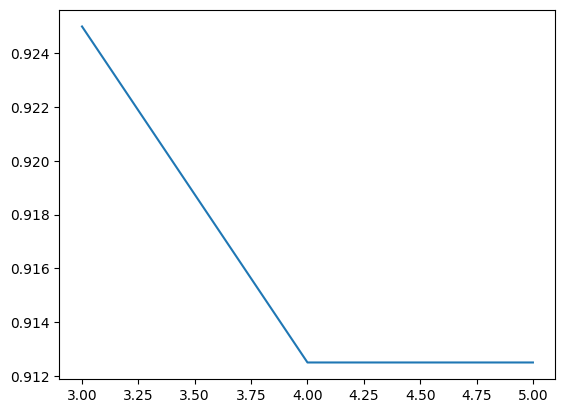

In [14]:
plt.plot(range(3,6),accuracy)

In [42]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_pred = knn.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.925

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[48,  6],
       [ 0, 26]], dtype=int64)

In [50]:
accuracy_score(y_test, y_pred)*100

92.5

<h1>Conclusion: The K-NN classifier achieved its best performance with (k = 3), from the values k = {3,4,5} yielding an accuracy of 92.5%.</h1>

In [57]:
def predict_output():
    age = int(input("Enter the age: "))
    salary = int(input("Enter the salary: "))

    X_new = np.array([[age], [salary]]).reshape(1, 2)
    X_new = scaler.transform(X_new)

    prediction = knn.predict(X_new)[0]

    if prediction == 0:
        return 'Will not purchase'
    else:
        return 'Will purchase'

In [59]:
predict_output()

Enter the age:  32
Enter the salary:  86000


'Will not purchase'

In [71]:
predict_output()

Enter the age:  50
Enter the salary:  10000000


'Will purchase'